Introduction to Machine Learning and Analysis (Statistics)

Analyst = Kofi Anane Poku

Linkedin Profile : `linkedin.com/in/kofi-poku-anane`

TABLE OF CONTENT

Link to Download Dataset

Link : https://drive.google.com/file/d/1DOR27v106RGgnPF8YWSuw43413RdkZEs/view?usp=drive_link

Link : https://github.com/kananep/datasets/blob/main/Zomato%20Dataset.csv

This is the analysis of Zomato Delivery Dataset, a food delivery dataset. I applied a multilinear regression to know how best each food was delivered on time and the worst time a food was delivered and other relevant insights.

This dataset provides a comprehensive view of delivery operations, including delivery person details, order timestamps, weather conditions, and more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
zomato = pd.read_csv("Zomato Dataset.csv")

In [3]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# Data Cleaning (Turn data into numbers)

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [5]:
zomato.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [6]:
#cleaning numeric column

zomato_numeric = zomato.select_dtypes(include= ["int64" , "float64"])
zomato_numeric = zomato_numeric.fillna(zomato_numeric.median)
zomato.update(zomato_numeric)

C:\Users\toy\AppData\Local\Temp\ipykernel_2920\1855351985.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[36.0 21.0 23.0 ... 30.0 20.0 23.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  zomato.update(zomato_numeric)
C:\Users\toy\AppData\Local\Temp\ipykernel_2920\1855351985.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.2 4.7 4.7 ... 4.9 4.7 4.9]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  zomato.update(zomato_numeric)
C:\Users\toy\AppData\Local\Temp\ipykernel_2920\1855351985.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.0 1.0 1.0 ... 0.0 1.0 1.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  zomato.update(zomato_n

In [7]:
# cleaning object column by converting them into categories and applying the .codes function to turn them
#into numbers

zomato_object = zomato.select_dtypes(include=["object"])


for key in zomato_object.columns:
    zomato[key] = pd.Categorical(zomato_object[key]).codes + 1
    
zomato.update(zomato)    

In [8]:
#checking if there is nall values in the dataset

if zomato.isna().sum().any() > 0:
    print("There are null values in the dataset")
else:    
    print("There are no null values in the dataset")


There are no null values in the dataset


In [9]:
#Checking Duplicated rows in the dataset
duplicated_rows = zomato[zomato.duplicated()].shape[0]
if(duplicated_rows == 0):
    print('There is no duplicated row in the csv file')
else:
    print('There is duplicated rows in the csv file')   

There is no duplicated row in the csv file


In [10]:
# Summary statistics
zomato.describe()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,22792.500000,754.161592,10.970604,7.181665,17.017948,70.229684,17.465480,70.844161,22.370612,103.396257,117.285495,3.435394,2.696319,1.023385,2.509806,3.248399,2.475474,1.014654,1.421859,26.293963
std,13159.111672,376.059710,6.067281,3.892334,8.185674,22.885575,7.335562,21.120578,12.850847,55.883375,58.151881,1.741201,0.982272,0.839055,1.118298,0.602490,0.755045,0.156344,0.860898,9.384298
min,1.000000,1.000000,1.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000
25%,11396.750000,401.000000,6.000000,4.000000,12.933284,73.170000,12.988453,73.280000,11.000000,48.000000,59.000000,2.000000,2.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,19.000000
50%,22792.500000,706.000000,11.000000,7.000000,18.551440,75.897963,18.633934,76.002574,22.000000,122.000000,135.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,26.000000
75%,34188.250000,1106.000000,16.000000,10.000000,22.728163,78.044095,22.785049,78.107044,34.000000,149.000000,164.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,32.000000
max,45584.000000,1320.000000,23.000000,29.000000,30.914057,88.433452,31.054057,88.563452,44.000000,176.000000,193.000000,6.000000,4.000000,3.000000,4.000000,4.000000,5.000000,2.000000,3.000000,54.000000


# Correlation Analysis

In [11]:
zomato.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,40734,469,1,1,30.327968,78.046106,30.397968,78.116106,19,156,170,2,2,2,4,3,1,1,1,46
1,43266,826,2,2,10.003064,76.307589,10.043064,76.347589,21,86,92,4,1,1,3,3,2,1,1,23
2,4787,1119,3,2,18.562450,73.916619,18.652450,74.006619,7,111,121,3,4,1,2,4,2,1,1,21
3,39614,944,4,3,30.899584,75.809346,30.919584,75.829346,21,28,30,3,3,0,1,3,3,1,1,20
4,43667,761,5,2,26.463504,80.372929,26.593504,80.502929,23,135,147,2,2,1,4,4,2,1,1,41


<Axes: >

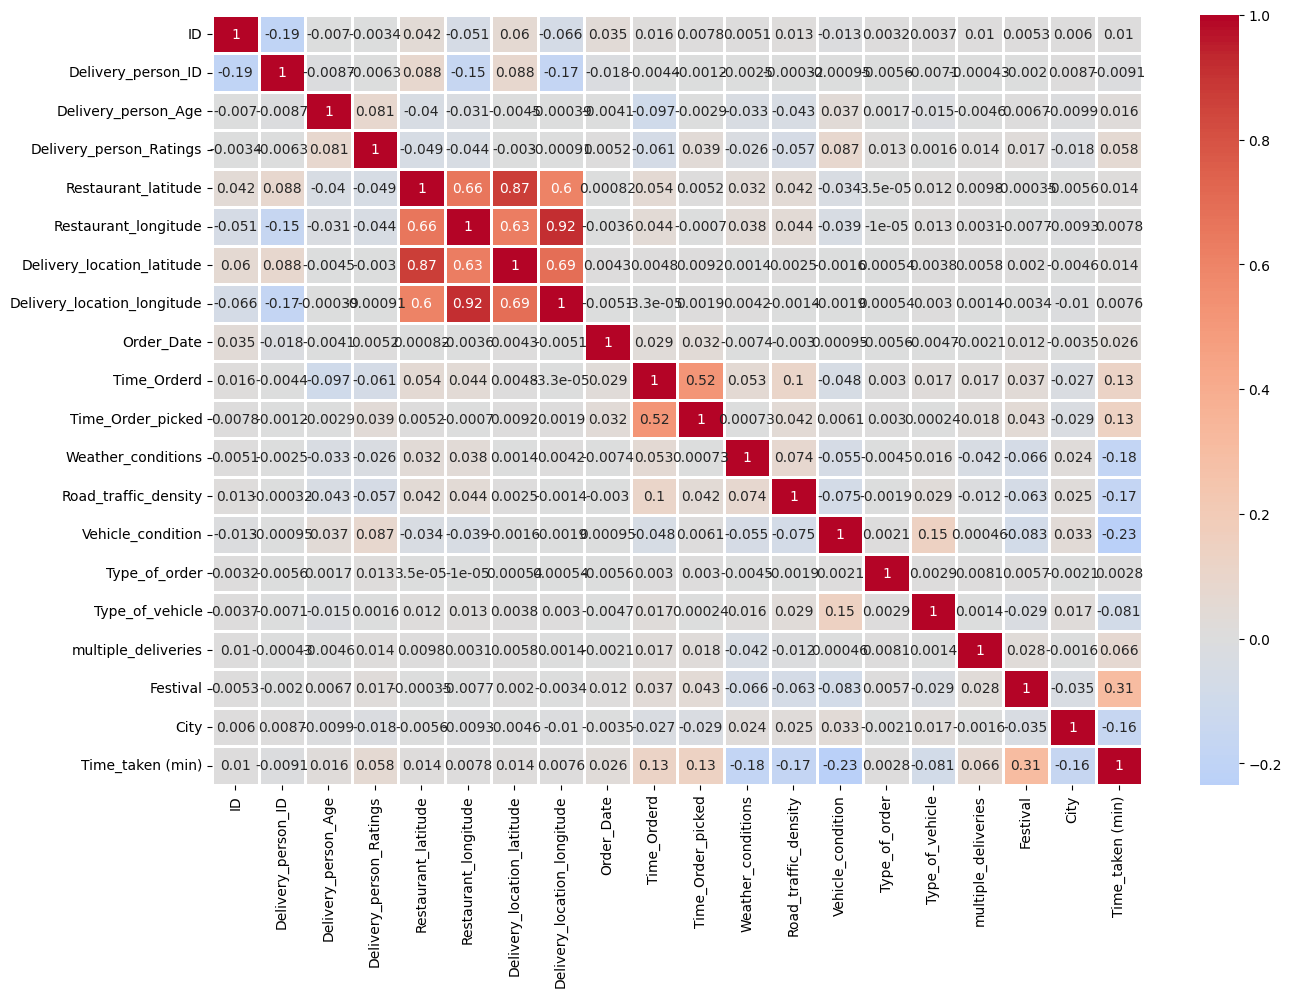

In [12]:
fig , ax = plt.subplots(figsize = (15 , 10))
sns.heatmap(zomato.corr() ,
            annot= True ,
            fmt = '.2g' ,
            center= 0 , 
            cmap = 'coolwarm' , 
            linewidths = 1 , 
            )

In [13]:
zomato.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

# MultiLinear Regression 

Chi-square Test

Chi-square test are used to compare variables whether there is a relationship between variables

In [14]:
zomato.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,40734,469,1,1,30.327968,78.046106,30.397968,78.116106,19,156,170,2,2,2,4,3,1,1,1,46
1,43266,826,2,2,10.003064,76.307589,10.043064,76.347589,21,86,92,4,1,1,3,3,2,1,1,23
2,4787,1119,3,2,18.562450,73.916619,18.652450,74.006619,7,111,121,3,4,1,2,4,2,1,1,21


In [15]:
tab = pd.crosstab(index = zomato['Time_taken (min)'],
                  columns = zomato['Type_of_vehicle'])
tab.head()

Type_of_vehicle,1,2,3,4
Time_taken (min),,,,
10,1,83,341,325
11,1,86,317,353
12,2,77,314,353
13,1,83,303,329
14,2,90,324,323


In [16]:
chi2 , p, dof, exp = st.chi2_contingency(tab)
print(p)

if p > 0.05:
    print('There is no relationship between the variables (fail to reject the null hypothesis(H0)) ')
else:
    print('There is strong relationship between the variables (reject the null hypothesis(H0))')  

1.845567303439554e-290
There is strong relationship between the variables (reject the null hypothesis(H0))


## Check VIF(Variance Inflation Factor) for Confirmation

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# zomato is your dataset and 'Time_taken (min)' is the dependent variable
x = zomato.drop(columns=['Time_taken (min)'])  # Drop dependent variable

# Add a constant column for intercept
x = sm.add_constant(x)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display VIF results
print(vif_data)

                        Feature         VIF
0                         const  146.457512
1                            ID    1.106554
2            Delivery_person_ID    1.211201
3           Delivery_person_Age    1.023624
4       Delivery_person_Ratings    1.033198
5           Restaurant_latitude    5.754863
6          Restaurant_longitude    8.958343
7    Delivery_location_latitude    6.444693
8   Delivery_location_longitude    9.748198
9                    Order_Date    1.003019
10                  Time_Orderd    1.438165
11            Time_Order_picked    1.395618
12           Weather_conditions    1.023219
13         Road_traffic_density    1.037699
14            Vehicle_condition    1.057533
15                Type_of_order    1.000370
16              Type_of_vehicle    1.027500
17          multiple_deliveries    1.003463
18                     Festival    1.021012
19                         City    1.005101


In [18]:
x.shape[1]

20

In [19]:
# Interpretation of VIF
def vif_interpretation(vif):
    if vif < 5:
        return "✅ No multicollinearity issue"
    elif 5 <= vif < 10:
        return "⚠️ Moderate multicollinearity, may need attention"
    else:
        return "❌ Strong multicollinearity, variable should be removed or transformed"

# Apply interpretation
vif_data["Interpretation"] = vif_data["VIF"].apply(vif_interpretation)

# Display results
print(vif_data)

                        Feature         VIF  \
0                         const  146.457512   
1                            ID    1.106554   
2            Delivery_person_ID    1.211201   
3           Delivery_person_Age    1.023624   
4       Delivery_person_Ratings    1.033198   
5           Restaurant_latitude    5.754863   
6          Restaurant_longitude    8.958343   
7    Delivery_location_latitude    6.444693   
8   Delivery_location_longitude    9.748198   
9                    Order_Date    1.003019   
10                  Time_Orderd    1.438165   
11            Time_Order_picked    1.395618   
12           Weather_conditions    1.023219   
13         Road_traffic_density    1.037699   
14            Vehicle_condition    1.057533   
15                Type_of_order    1.000370   
16              Type_of_vehicle    1.027500   
17          multiple_deliveries    1.003463   
18                     Festival    1.021012   
19                         City    1.005101   

            

In [20]:
zomato['Weather_Traffic_Interaction'] = zomato['Weather_conditions'] * zomato['Road_traffic_density']


In [21]:
#isolate X and Y
y = zomato['Time_taken (min)']
x = zomato[['Festival', 'City' ,'multiple_deliveries','Type_of_vehicle','Vehicle_condition','Road_traffic_density'
            ,'Weather_conditions','Delivery_person_Ratings']]

In [22]:
# Training and Testing Dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x , y ,
                                                      test_size = 0.2,
                                                      random_state = 1502)

In [23]:
x_train.head()

,Festival,City,multiple_deliveries,Type_of_vehicle,Vehicle_condition,Road_traffic_density,Weather_conditions,Delivery_person_Ratings
6448,1,3,2,2,2,3,2,6
22087,1,1,2,3,0,3,6,8
27408,1,1,2,2,2,3,1,11
39315,1,1,3,4,2,3,1,2
9511,1,0,2,3,0,3,2,6


In [24]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_train.head()


,const,Festival,City,multiple_deliveries,Type_of_vehicle,Vehicle_condition,Road_traffic_density,Weather_conditions,Delivery_person_Ratings
6448,1.0,1,3,2,2,2,3,2,6
22087,1.0,1,1,2,3,0,3,6,8
27408,1.0,1,1,2,2,2,3,1,11
39315,1.0,1,1,3,4,2,3,1,2
9511,1.0,1,0,2,3,0,3,2,6


In [25]:
model = sm.OLS(y_train , x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Time_taken (min)   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     1265.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:57:14   Log-Likelihood:            -1.2889e+05
No. Observations:               36467   AIC:                         2.578e+05
Df Residuals:                   36458   BIC:                         2.579e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# **My Interpretation of Result**

The R-squared is 21.7% , indicating that 21.7% of the dependent variable can be explain by the independent variables

The Coefficient (Intercept) indicate that when all independent variables are 0 , the time delivery will be 20.46 minutes

The Festival Independent varibale Coefficient is 15.7925 meaning as Festival increases in one unit , delivery time(Time taken(min)) is expected to increase by 15.7925 minutes 

The Coefficient of the City variable is -1.4305 showing that as the City changes by one unit , the dependent variable is expected to decrease by 1.4305 minutes to deliver the products

The coefficient of multiple_deliveries is 0.6561 , which shows that as the multiple_deliveries changes by one unit , the dependent variable is expected to increase by 0.6561 minutes 

The coefficient of Type_of_vehicle is -0.4256 , which shows that as the Type_of_vehicle changes by one unit , the dependent variable is expected to decrease by -0.4256 minutes

The Coefficient of Vehicle_condition is -2.5844 which shows that , changes in the vehicle_condition will cause the delivery time to decrease leading to faster distribution of products


The coefficient Road_traffic_density is -1.4762 , showing that a one unit change in Road_traffic_density will cause decrease in the delivery time of 1.4762 minutes


The Weather_conditions has a coefficient of -0.8167 meaning a change in the weather condition will cause the delivery time to decrease by -0.8167 minutes

The Delivery_person_Ratings has a coefficient of 0.1381 , indicating that a one unit change in the delivery person ratings will cause an increase of time 0.1381 minutes to deliver the products

# **AI Interpretation of Result**

1. `R-squared` (0.217 or 21.7%)
This means that 21.7% of the variation in delivery time is explained by the independent variables in the model.

The remaining 78.3% is due to other factors not included in the model, such as road conditions, driver behavior, unexpected delays, etc.

Key takeaway: Your model has some explanatory power but could be improved with additional relevant variables.




2. `Intercept (Constant)` = 20.4674
This means that if all independent variables were zero, the predicted delivery time would be 20.4674 minutes.

However, this interpretation depends on whether "zero" is a meaningful value for each variable.

For example, a "zero" festival might mean "no festival," which makes sense.

But a "zero" city or weather condition might not be meaningful in a real-world setting.

Key takeaway: The intercept is just a starting point; it’s not always meaningful in isolation.



3. ### **Interpreting the Coefficients**
✅ `Festival` = 15.7925
This means that during a festival, delivery time increases by 15.79 minutes compared to non-festival days.

Why? Likely due to increased traffic, more orders, and road congestion.

Key takeaway: Festivals cause significant delays.




✅ `City`= -1.4305
A one-unit increase in the City variable reduces delivery time by 1.43 minutes.

What does this mean?

If different cities are coded numerically (e.g., City A = 1, City B = 2, etc.), this suggests that moving from one city category to another reduces delivery time.

Some cities may have better infrastructure, more delivery personnel, or shorter distances.

Key takeaway: Certain cities have faster delivery times than others.




✅ `Multiple Deliveries` = 0.6561
This means each additional delivery assigned to a rider increases the time taken by 0.6561 minutes.

Why? More deliveries = more stops, longer waiting time, and possible route diversions.

Key takeaway: More deliveries per rider increase delivery time.




✅ `Type of Vehicle` = -0.4256
A one-unit change in vehicle type reduces delivery time by 0.4256 minutes.

What does this mean?

If vehicles are coded as numbers (e.g., 1 = bike, 2 = car, 3 = van), then moving to a higher vehicle type reduces delivery time.

This could suggest that larger vehicles are faster (which seems odd) OR that the numbering system is reversed.

Key takeaway: Check how vehicle types are encoded—this will determine whether this coefficient makes sense.




✅ `Vehicle Condition` = -2.5844
A better vehicle condition reduces delivery time by 2.58 minutes.

Why? Well-maintained vehicles likely:

Have fewer breakdowns

Move more efficiently

Face fewer delays

Key takeaway: Better vehicle condition = faster delivery.





❌ `Road Traffic Density` = -1.4762 (Misinterpretation)
Your original interpretation: “Higher traffic density increases delay.”

Correction: The negative coefficient actually means higher road traffic density leads to faster deliveries (a reduction of 1.4762 minutes).

This is unexpected because we normally expect high traffic to slow down deliveries.

Possible explanations:

Data encoding issue: If lower values mean worse traffic and higher values mean smoother roads, then this interpretation would make sense.

Delivery optimization: Riders might take shortcuts or optimize routes better in high-traffic situations.

Key takeaway: Double-check how Road Traffic Density is coded in your dataset.





❌ `Weather Conditions` = -0.8167 (Misinterpretation)
Your original interpretation: "Worse weather increases delay."

Correction: The negative coefficient means better weather reduces delivery time by 0.8167 minutes.

Why?

If the Weather Conditions variable is coded such that higher values mean better weather (e.g., 1 = stormy, 2 = rainy, 3 = cloudy, 4 = sunny), then the negative coefficient makes sense:

Better weather → Faster deliveries

Key takeaway: Double-check if higher values in Weather Conditions mean better weather.





✅ `Delivery Person Ratings` = 0.1381
A one-unit increase in delivery person ratings increases time taken by 0.1381 minutes.

Why would a better-rated delivery person take longer?

Higher-rated riders may focus on customer service rather than speed (e.g., ensuring food is handled well, confirming orders, safer riding).

This could also indicate data bias—for example, longer routes may involve better-rated riders.

Key takeaway: Higher-rated delivery riders take slightly longer, possibly due to careful service.



## **Predictions**

In [29]:
print(x_train.columns)



Index(['const', 'Festival', 'City', 'multiple_deliveries', 'Type_of_vehicle',
       'Vehicle_condition', 'Road_traffic_density', 'Weather_conditions',
       'Delivery_person_Ratings'],
      dtype='object')


In [30]:
print(x_test.columns)

Index(['Festival', 'City', 'multiple_deliveries', 'Type_of_vehicle',
       'Vehicle_condition', 'Road_traffic_density', 'Weather_conditions',
       'Delivery_person_Ratings'],
      dtype='object')


In [31]:
import statsmodels.api as sm
x_test = sm.add_constant(x_test)
x_test.head()

,const,Festival,City,multiple_deliveries,Type_of_vehicle,Vehicle_condition,Road_traffic_density,Weather_conditions,Delivery_person_Ratings
6436,1.0,2,3,3,4,1,2,2,8
28357,1.0,1,1,2,3,1,2,2,11
2979,1.0,1,3,2,3,0,4,3,8
8335,1.0,1,1,3,3,1,2,5,9
37337,1.0,1,1,2,3,1,2,6,9


In [32]:
#Prediction
predictions = model.predict(x_test)
predictions[:5]

6436     41.961477
28357    29.214023
2979     24.753889
8335     27.143561
37337    25.670764
dtype: float64

## **Accuracy Assessment**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


print("MAE :" , round(mean_absolute_error(y_test , predictions),1))

print("RMSE" , round(np.sqrt(mean_squared_error(y_test , predictions)) , 1))

MAE : 6.8
RMSE 8.3
